# import packages

In [1]:
import numpy as np
import pyutils.fig as fg
import STmodel.data.cases as stc
import STmodel.model.st as stm

# plot configurations

In [2]:
pc = fg.PlotConfig('manuscript_single')

# load the case

In [3]:
case = stc.case.CaseSet('Lu_2021')

## specify unburnt state

In [4]:
unburnt = 'T-300_p-10_phi-0.6'
lr = 1.0

## get turbulent flame data

In [5]:
d = case.get_case_data(unburnt)

### $u'/s_L^0$ in the dataset

In [6]:
d.turbulence_intensity

array([ 2.,  5., 10., 15., 20.])

### $l_t/\delta_L^0$ in the dataset

In [7]:
d.turbulence_length_scale

array([1., 1., 1., 1., 1.])

### $s_T/s_L$ in the data set

In [8]:
d.turbulent_burning_velocity

array([ 7.36, 12.04, 16.51, 23.17, 30.31])

# set up model
## get Reactant object
use
case.get_reactant(unburnt)
or
stm.Reactant(unburnt, fuel, oxidizer, chemistry, **kw)

In [9]:
r = case.get_reactant(unburnt)

In [10]:
fuel = case.get_fuel_stream()
oxidizer = case.get_oxy_stream()
chemistry = case.get_mechanism()

In [11]:
r = stm.Reactant(unburnt, fuel, oxidizer, chemistry)

In [12]:
dir(r)

['Le',
 'ReF',
 'Ze',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'diffusive_thickness',
 'laminar_flame_speed',
 'p',
 'sigma',
 'stretch_factor_table',
 'thermal_thickness',
 'type_Le']

plot $I_0$ against Ka

Text(0, 0.5, '$I_0$')

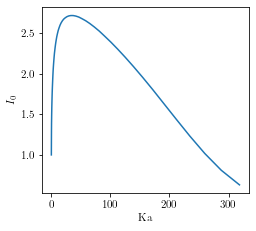

In [13]:
fig, ax = pc.get_simple()
ax.plot(r.stretch_factor_table.x, r.stretch_factor_table.y)

ax.set_xlabel('Ka')
ax.set_ylabel('$I_0$')

## get Model object

In [14]:
m = stm.Model(r)

In [15]:
dir(m)

['A',
 'B',
 'C',
 'C0',
 'C_lr',
 'Ka',
 'Ka_def',
 'Re',
 'T',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ratio_flame_surface',
 'ratio_turbulent_burning_velocity',
 'reactant',
 'stretch_factor',
 'turbulent_burning_velocity',
 'type_C0']

# Apply the model

In [16]:
nx = 50

ur_list = np.linspace(0, 25, num=nx)

sr = np.zeros(nx)

In [17]:
for i, ur in enumerate(ur_list):
    # calculate model predicitons
    sr[i] = m.ratio_turbulent_burning_velocity(ur, lr)

# Plot results

Text(0, 0.5, '$s_T/s_L^0$')

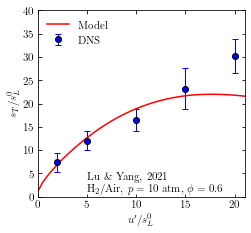

In [19]:

fig, ax = pc.get_simple()

ax.errorbar(d.turbulence_intensity,
            d.turbulent_burning_velocity,
            yerr=d.turbulent_burning_velocity_std,
            fmt='o', c='b', mec='k', ms=6, mew=1,
            capsize=3, capthick=1.5, elinewidth=1,
            label='DNS')

ax.plot(ur_list, sr, '-', c='r',label='Model')

ax.set_xlim(0, 21)
ax.set_ylim(0, 40)

ax.set_xticks(np.linspace(0, 20, num=5))
ax.set_yticks(np.linspace(0, 40, num=9))

ax.legend(frameon=False)

ax.text(5, 1,
        'Lu \& Yang, 2021\n'
        +r'H$_2$/Air, $p=10\;\mathrm{atm}$, $\phi=0.6$')

ax.tick_params(which='major', direction='in', bottom=True, top=True, left=True, right=True)

ax.set_xlabel(r'$u^\prime/s_L^0$')
ax.set_ylabel(r'$s_T/s_L^0$')
